Machine Learning Decision Tree - Ground Weather

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
#read atmospheric weather csv file
a_data = pd.read_csv('atmospheric_weather_preprocessed.csv')
a_data.head()

,temperature,humidity,pressure,image
0,209.477417,3.186864,18499.99771,0
1,209.747436,3.067529,18499.99771,0
2,210.730987,2.938781,26399.99924,0
3,211.201355,2.554327,39799.99924,0
4,210.796722,2.694520,38599.99771,0


In [3]:
#identify variables
X = np.array(a_data.iloc[:,0:3])
Y = np.array(a_data['image'])

In [4]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)

In [5]:
#preform decision tree classifier
a_dt_c = tree.DecisionTreeClassifier()
a_dt_c.fit(X_train, Y_train)
pred = a_dt_c.predict(X_test)

In [6]:
#show results
print('Accuracy Score: ', accuracy_score(Y_test,pred))

Accuracy Score:  0.6093457943925233


Text(113.9222222222222, 0.5, 'Predicted')

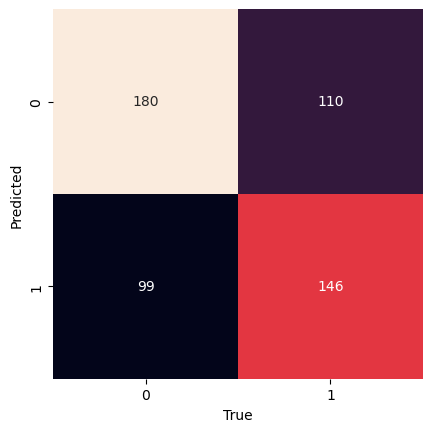

In [7]:
a_mat = confusion_matrix(Y_test, pred)
sns.heatmap(a_mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')

In [8]:
print(metrics.classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63       290
           1       0.57      0.60      0.58       245

    accuracy                           0.61       535
   macro avg       0.61      0.61      0.61       535
weighted avg       0.61      0.61      0.61       535



In [9]:
#transfer decision tree into visual
export_graphviz(a_dt_c, out_file='Atmospheric_Weather_Decision_Tree.dot')